# **Capstone Project**:

This capstone project is a final project that can show the ability developed from the professional Machine Learning and Artificial Intelligent program and answer a question of interest using the various tools that have encountered. The project followed the most widely- used methodology for data mining process called a Cross-Industry Standard Process for Data Mining (CRISP-DM). The methodology provides a structured approach for planning and data mining project. The methodology has six phases Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

# **CRISP-DM FARMWORK**

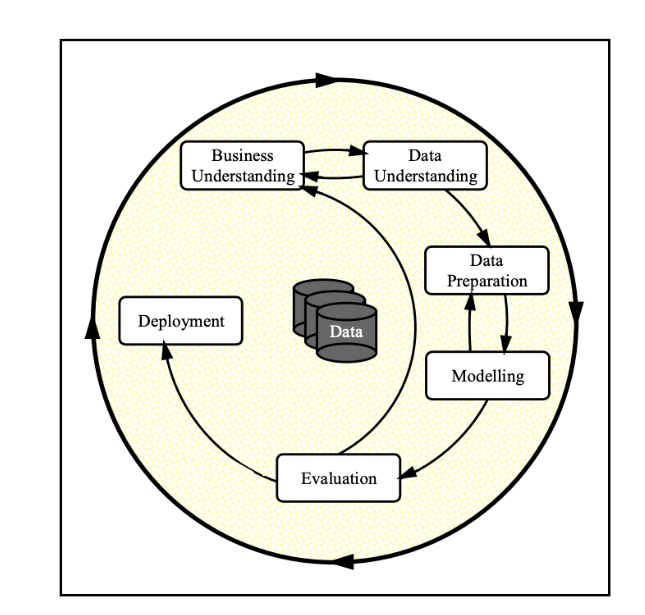


### **Business Understanding**: 
The exorbitant house price for home buyers to buy their house dream is the biggest challenge. Ask a home buyer to describe their dream house, they won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. However, instead begin with the price negotiations. We know that many people didn’t get their house dream because of the daily increase of house price, and this throws many people to live in a rent. The renters and realtors exploit the problem and skyrocketing the leasing. 

Goal: The goal of the project is to develop and compare a regression models, eventually selecting the best model that helps the residential home buyers in Ames, Iowa to predict an affordable sale price for their house dream. The project begins trained the models on the original feature data, then trained the models on the log transformed target and comparing to the original models results and give the best model recommendation for the residential home’s buyers in Ames, Iowa.

In [ ]:
#Import data reading and visaulizing tools:
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import data Preprocessing tools from scikit learn:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.decomposition import PCA,FastICA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from sklearn.impute import SimpleImputer,KNNImputer

# Import classifiers of a machine learning regression problems from scikit learn:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm as lgb
from sklearn.compose import TransformedTargetRegressor
from sklearn.inspection import permutation_importance

#Import Models performance evaluation tools from scikit learn:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display="diagram")
from sklearn.utils import shuffle

### **Data Understanding**:

### About Dataset:

Data Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

The data is collected online from the largest data science community and machine learning platform called Kaggle. The dataset has 81 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The data understanding part of analytics cycle is about data availability,data collection,data granularity,verify data quality, and data exploration. 

### Dataset Description:
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


Above grade (ground) living area square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [ ]:
#read the data
#Run to connect to google drive
#from google.colab import drive
#drive.mount('/content/drive')
sale_price=pd.read_csv('/content/drive/MyDrive/Capstone Project/train.csv')

In [ ]:
#reading top five of the data set
pd.options.display.max_columns=None
sale_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#checking the shape of the data set
sale_price.shape

(1460, 81)

The dataset has 81 entries and 1460 datapoints. 

In [ ]:
sale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
sale_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
sale_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


 Only data between 25% and 75% quartile are used. Others outside from this range are not considered.

In [ ]:
#Checking missing values 
pd.options.display.max_columns=None
pd.options.display.max_rows=None
sale_price.isna().sum()/sale_price.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

Some features of the data set have huge amout of missing values. Alley feature has more than 93%, FireplaceQu more than 47%, PoolQC more than 99%, Fence more than 80%, and Miscfeature more than 96% missing value. Those features do not help and will discarded. 

### **Data Preparation**:
The data preparation step is about organizing the data into a structure form, resolving structure errors, removing, and correcting data that are incorrect, corrupt, and duplicate. This is the heavy lifting task. Almost 80% of the project is a data preparation. Removing the outliers also a data preparation part helps improving the model performance. 


In [ ]:
# Before filling and removing the missing values,get a copy of the orginal data set
data_copy=sale_price.copy()

In [ ]:
sale_price=data_copy

Numerica data cleaning:

this numerical data cleaning includes extracting of relevant content from a data by removing like outlier

In [ ]:
# Upper percentile and lower percentile based on sale price 
price_1 =sale_price['SalePrice'].quantile(0.80) 
price_2 =sale_price['SalePrice'].quantile(0.20)
print(f'upper percentile based on the sale price is:{price_1}')
print(f'lower percentile based on the sale price is:{price_2}')

upper percentile based on the sale price is:230000.0
lower percentile based on the sale price is:124000.0


In [ ]:
sale_price=sale_price[(sale_price['SalePrice']<price_1) &(sale_price['SalePrice']>price_2)]

categorical data cleaning:

The categorical cleaning includes cleaning miss values, duplicate, and incorrect values from all categorical features.

In [ ]:
missing_data=[]
for column in sale_price.columns:
  if sale_price[column].isna().sum()/sale_price.shape[0]*100>10:
   missing_data.append(column) 
print(missing_data)

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


From the above information 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' has more than 10% missing data set. Those features won't helpful for the data exploratory analysis. This project keeps only features that have below 10% missing values.

In [ ]:
#drop features that have many missing values
sale_price.drop(['Id','LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
sale_price.shape

(868, 74)

After the features that have more values missing are dropped, the data set reduced to 868 entries and 74 attributes.

In [ ]:
sale_price.isnull().sum()/sale_price.shape[0]*100

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64

Data Visualization 

<Figure size 1080x432 with 0 Axes>

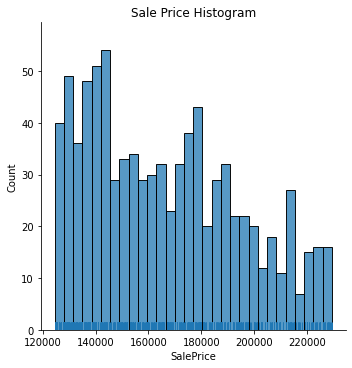

In [ ]:
#A seaborn histogram of the sale price
fig =plt.figure(figsize=(15,6))
sns.displot(data=sale_price,x='SalePrice',kind='hist',rug=True,bins=30,palette='lightblue')
plt.xlabel('SalePrice')
plt.title('Sale Price Histogram')
plt.show()

From the rug information of the above histogram, most high prices are fall on the range of 130,000 to 180,000. There are few areas more than 180,000 price. From the graph, the price distribution is skewed to the right. The central meaturements are not longer the same.  

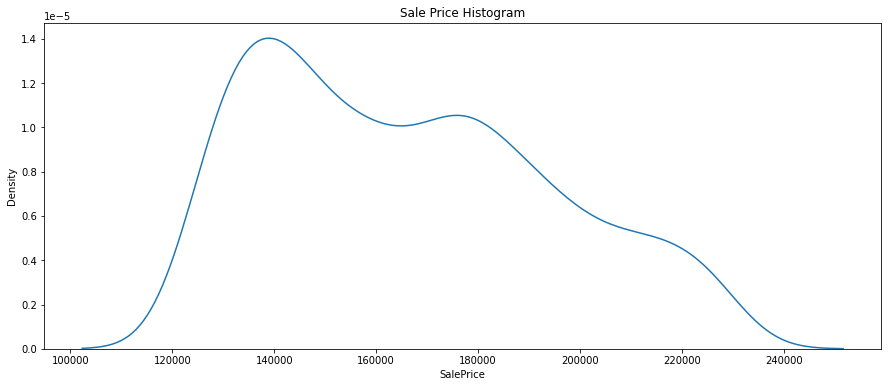

In [ ]:
#A seaborn kde of the sale price
fig =plt.figure(figsize=(15,6))
sns.kdeplot(sale_price['SalePrice'])
plt.xlabel('SalePrice')
plt.title('Sale Price Histogram')
plt.show()

The kde plot above tells the average price falls between the range of 130000 and 180000. The sale price distribution is skewed to the right. The mean, mode, amd medain are not the equal. The mean is on the right of the median. The graph does not have a clear center point. The data set are not uniformly edistributed.

<Figure size 1080x432 with 0 Axes>

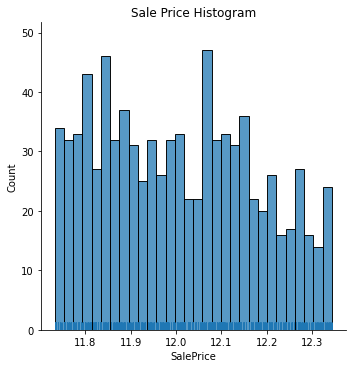

In [ ]:
#A seaborn histogram on the transformed sale price
fig =plt.figure(figsize=(15,6))
sns.displot(np.log1p(sale_price['SalePrice']),kind='hist',rug=True,bins=30,palette='lightblue')
plt.xlabel('SalePrice')
plt.title('Sale Price Histogram')
plt.show()

The graph is a histogram of a logrithmic transformed data. The distribution of the sale price still is not uniform. The distribution skewed to the right. The mean, medain, and mode are not the same. Need more transformation to bring to the Gaussian normal distribution.

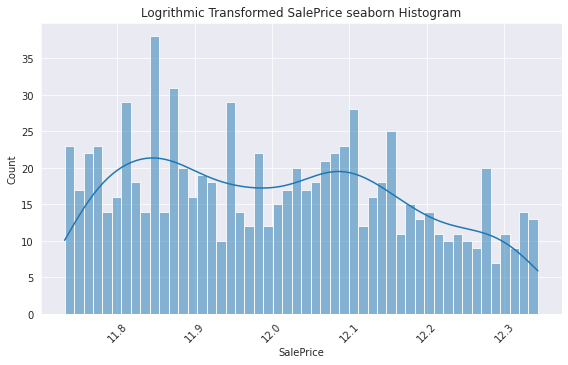

In [ ]:
#Seaborn age data set histogram
fig=plt.figure(figsize=(8,5))
sns.histplot(np.log1p(sale_price['SalePrice']), bins=50, kde=True)
plt.title('Logrithmic Transformed SalePrice seaborn Histogram')
plt.xlabel('SalePrice')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

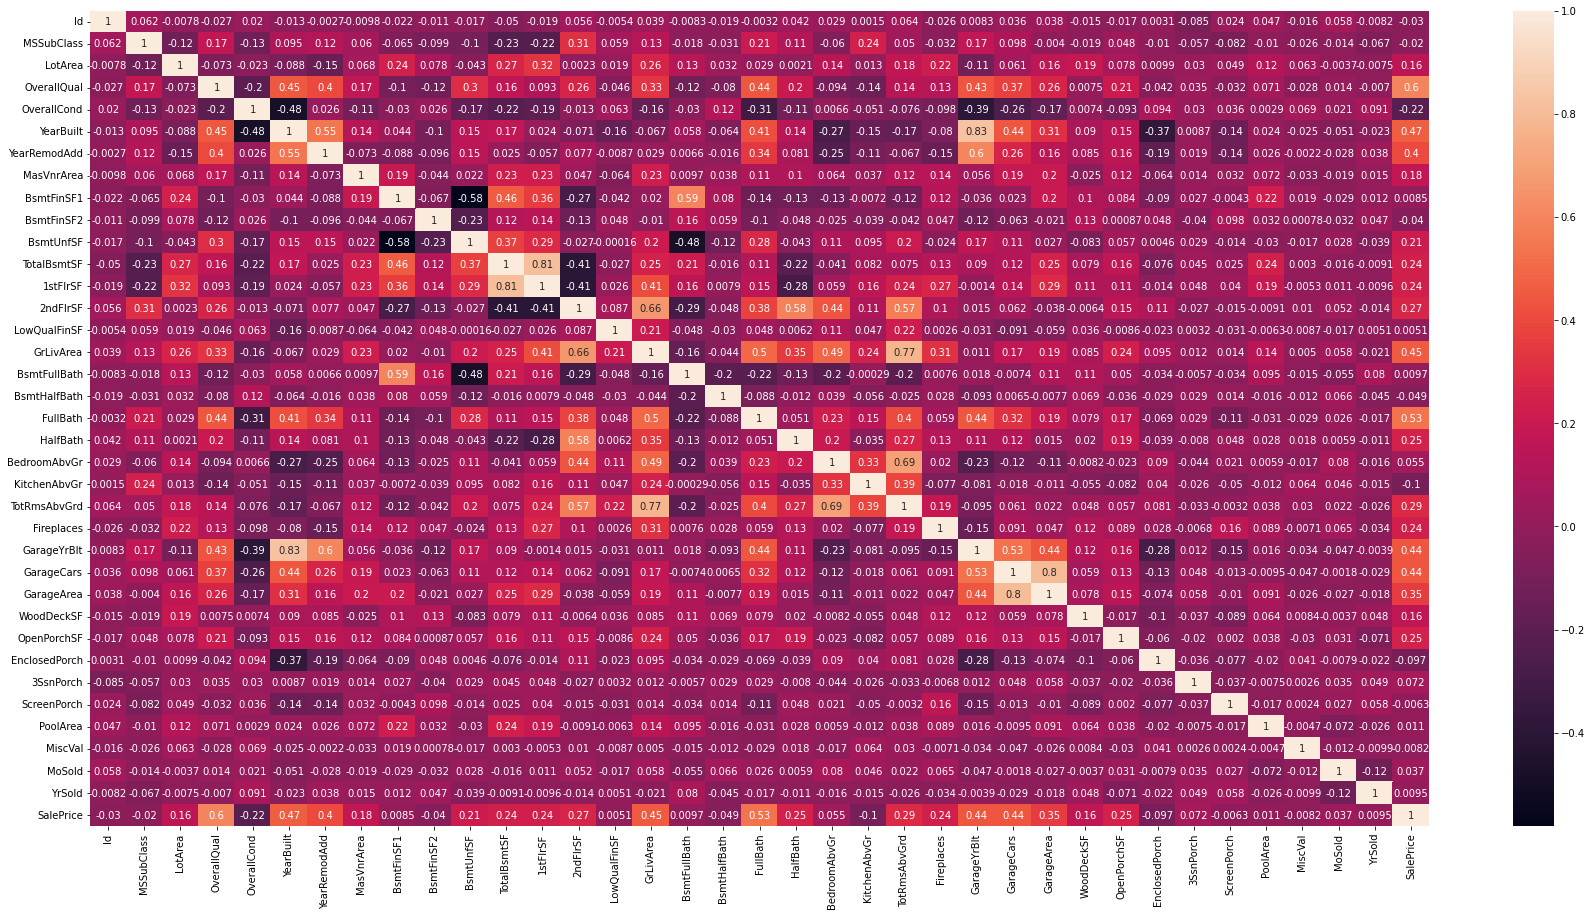

In [ ]:
# now let's investigate the independant variables and their correlations wiht the target.
fig=plt.figure (figsize=(30,15))
sns.heatmap(sale_price.corr(),annot=True)

From the seaborn heatmap above  it is easy to get features that are highly correlated to the Sale Price. like OverllQual, FullBath, and GrLivArea are top three strong positive correlated to the sale price. 



<Figure size 576x288 with 0 Axes>

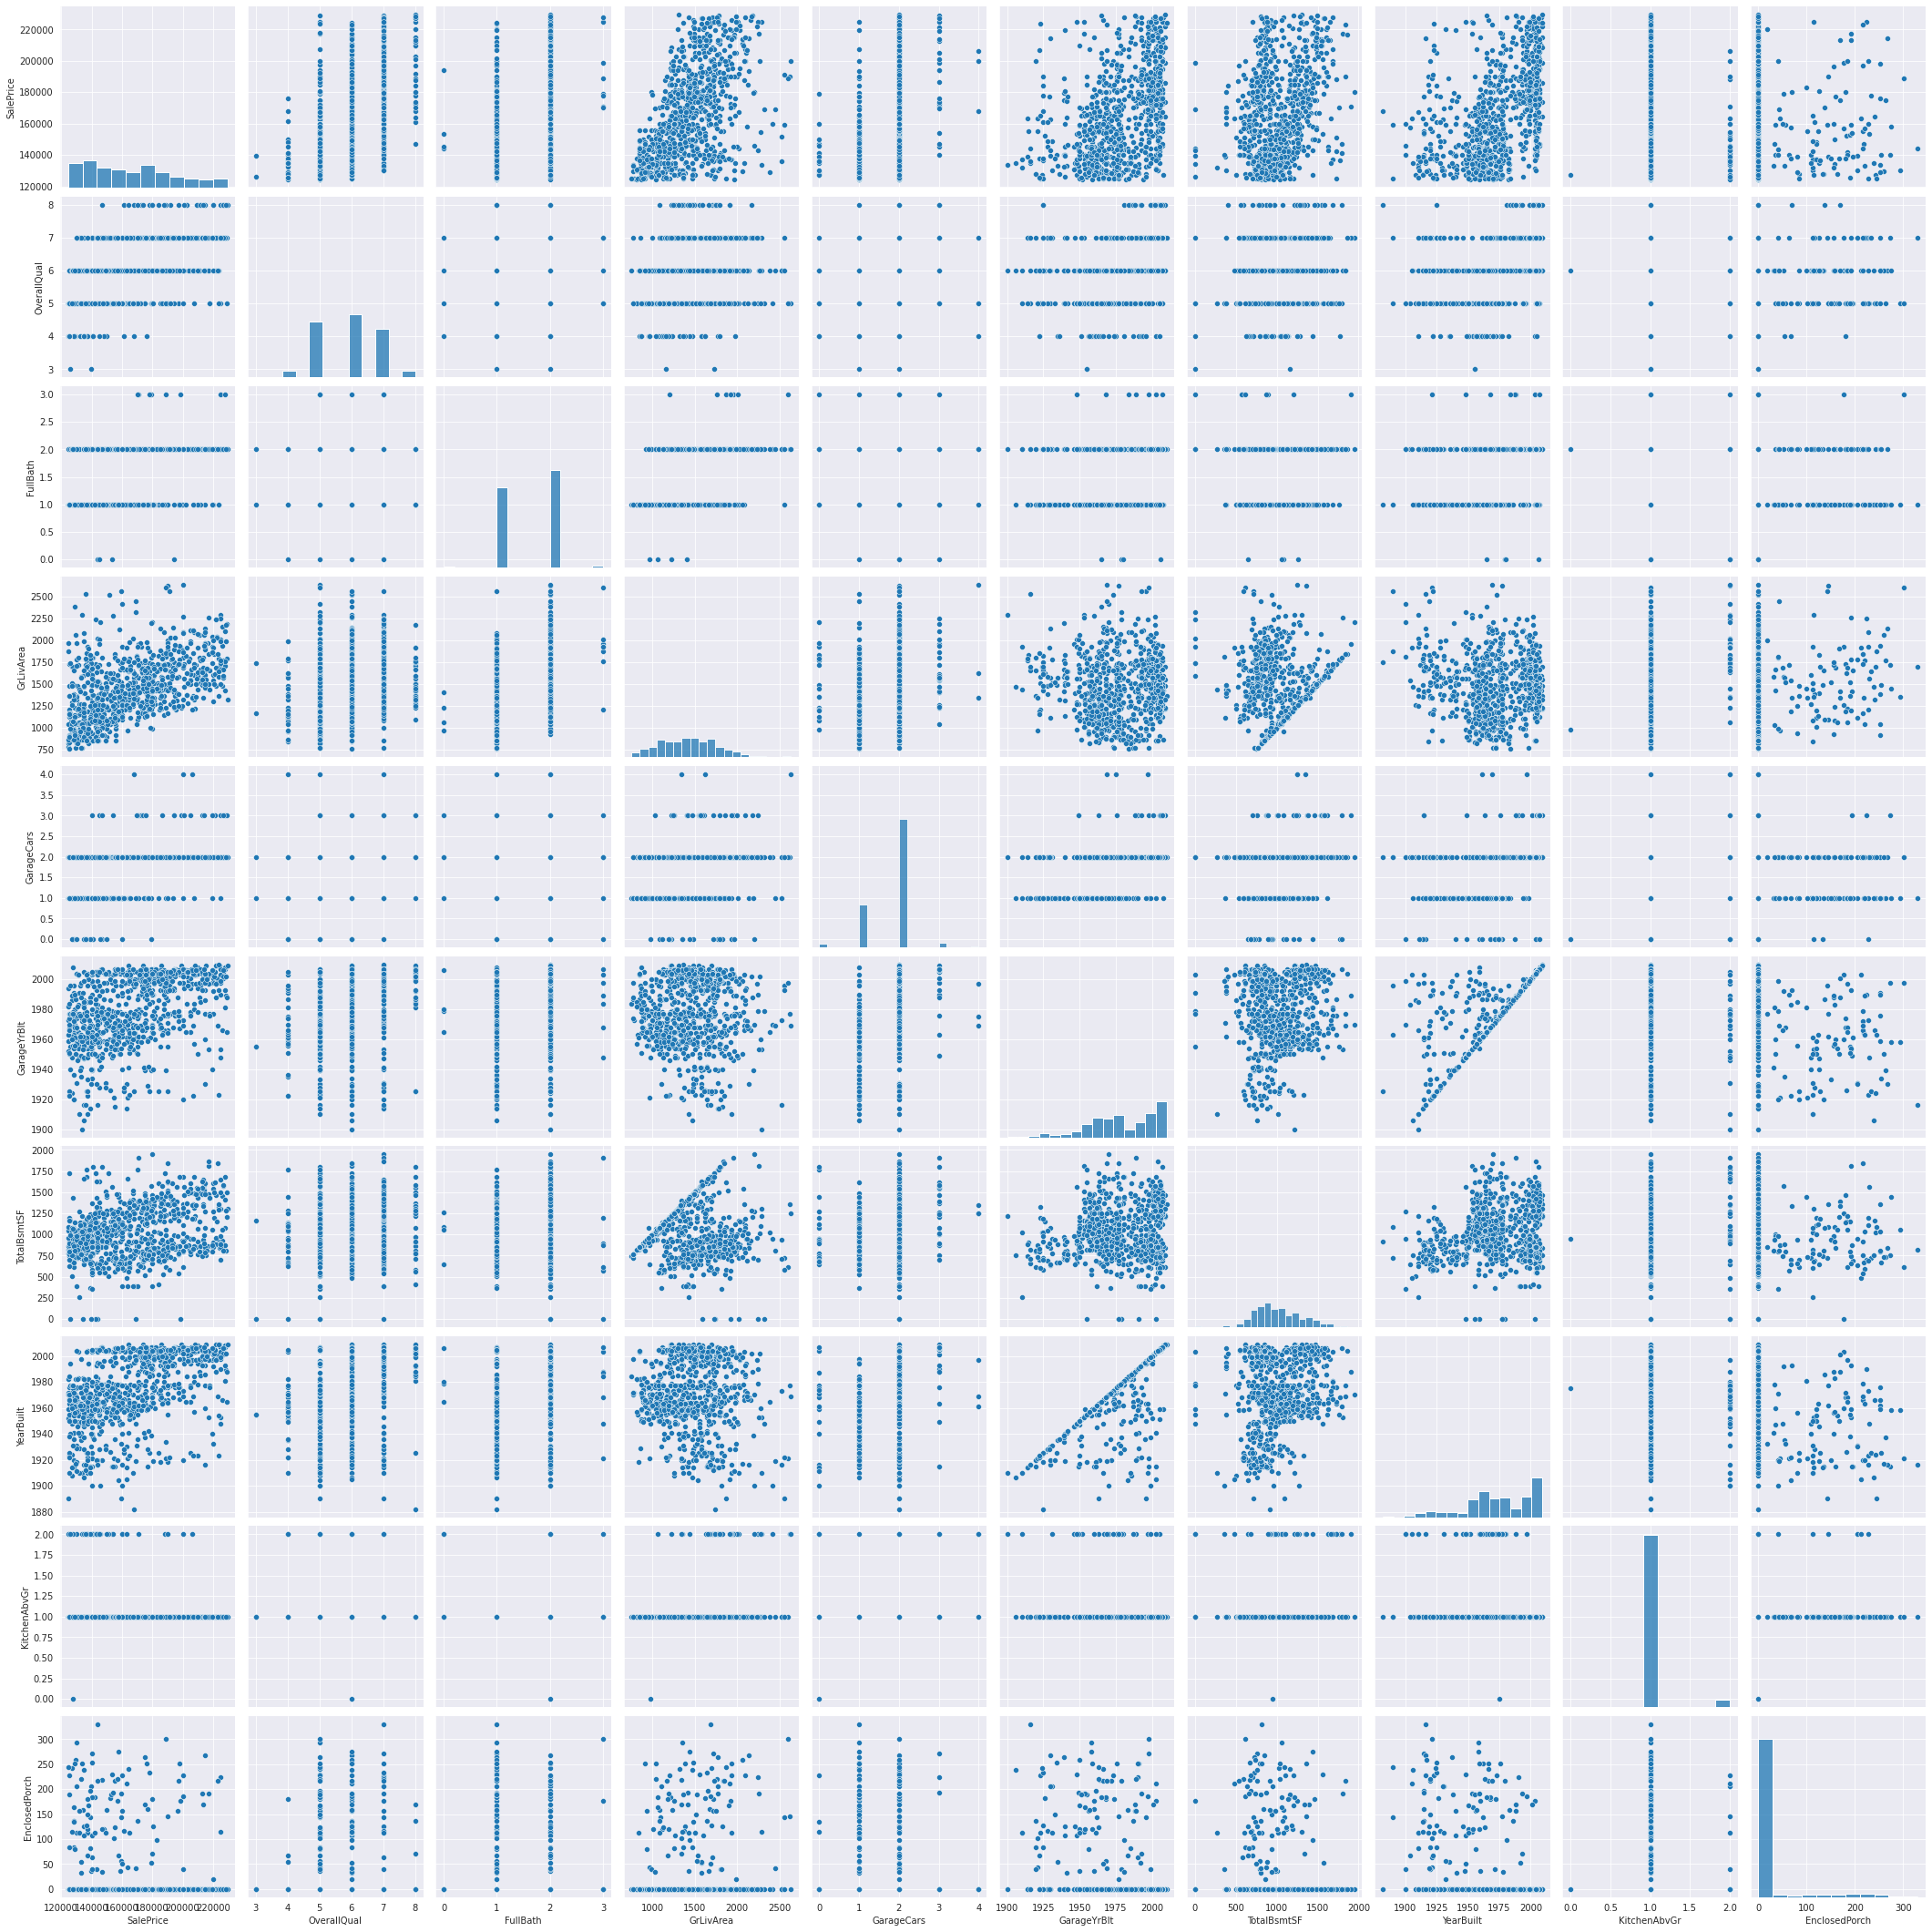

In [ ]:
#Seaborn pairplot of positive and negative features correlated to the sale price
arrtibutes=['SalePrice','OverallQual', 'FullBath','GrLivArea', 'GarageCars','GarageYrBlt', 'TotalBsmtSF', 'YearBuilt','KitchenAbvGr','EnclosedPorch']
fig=plt.figure (figsize=(8,4))
sns.pairplot(sale_price[arrtibutes], height=3)

There are clearly two significant outiars in GrLivArea and one outliars in TotalBsmtSF when plotted against the SalePrice target. Lets remove those outliars. By eyeballing on the pairplot graph, the GrLivArea outliars are above 3000. To remove them, we will only take GrLivArea below 3000. 

In [ ]:
sale_price=sale_price[(sale_price['GrLivArea']<3000) & (sale_price['TotalBsmtSF']<2000)]


<Figure size 576x288 with 0 Axes>

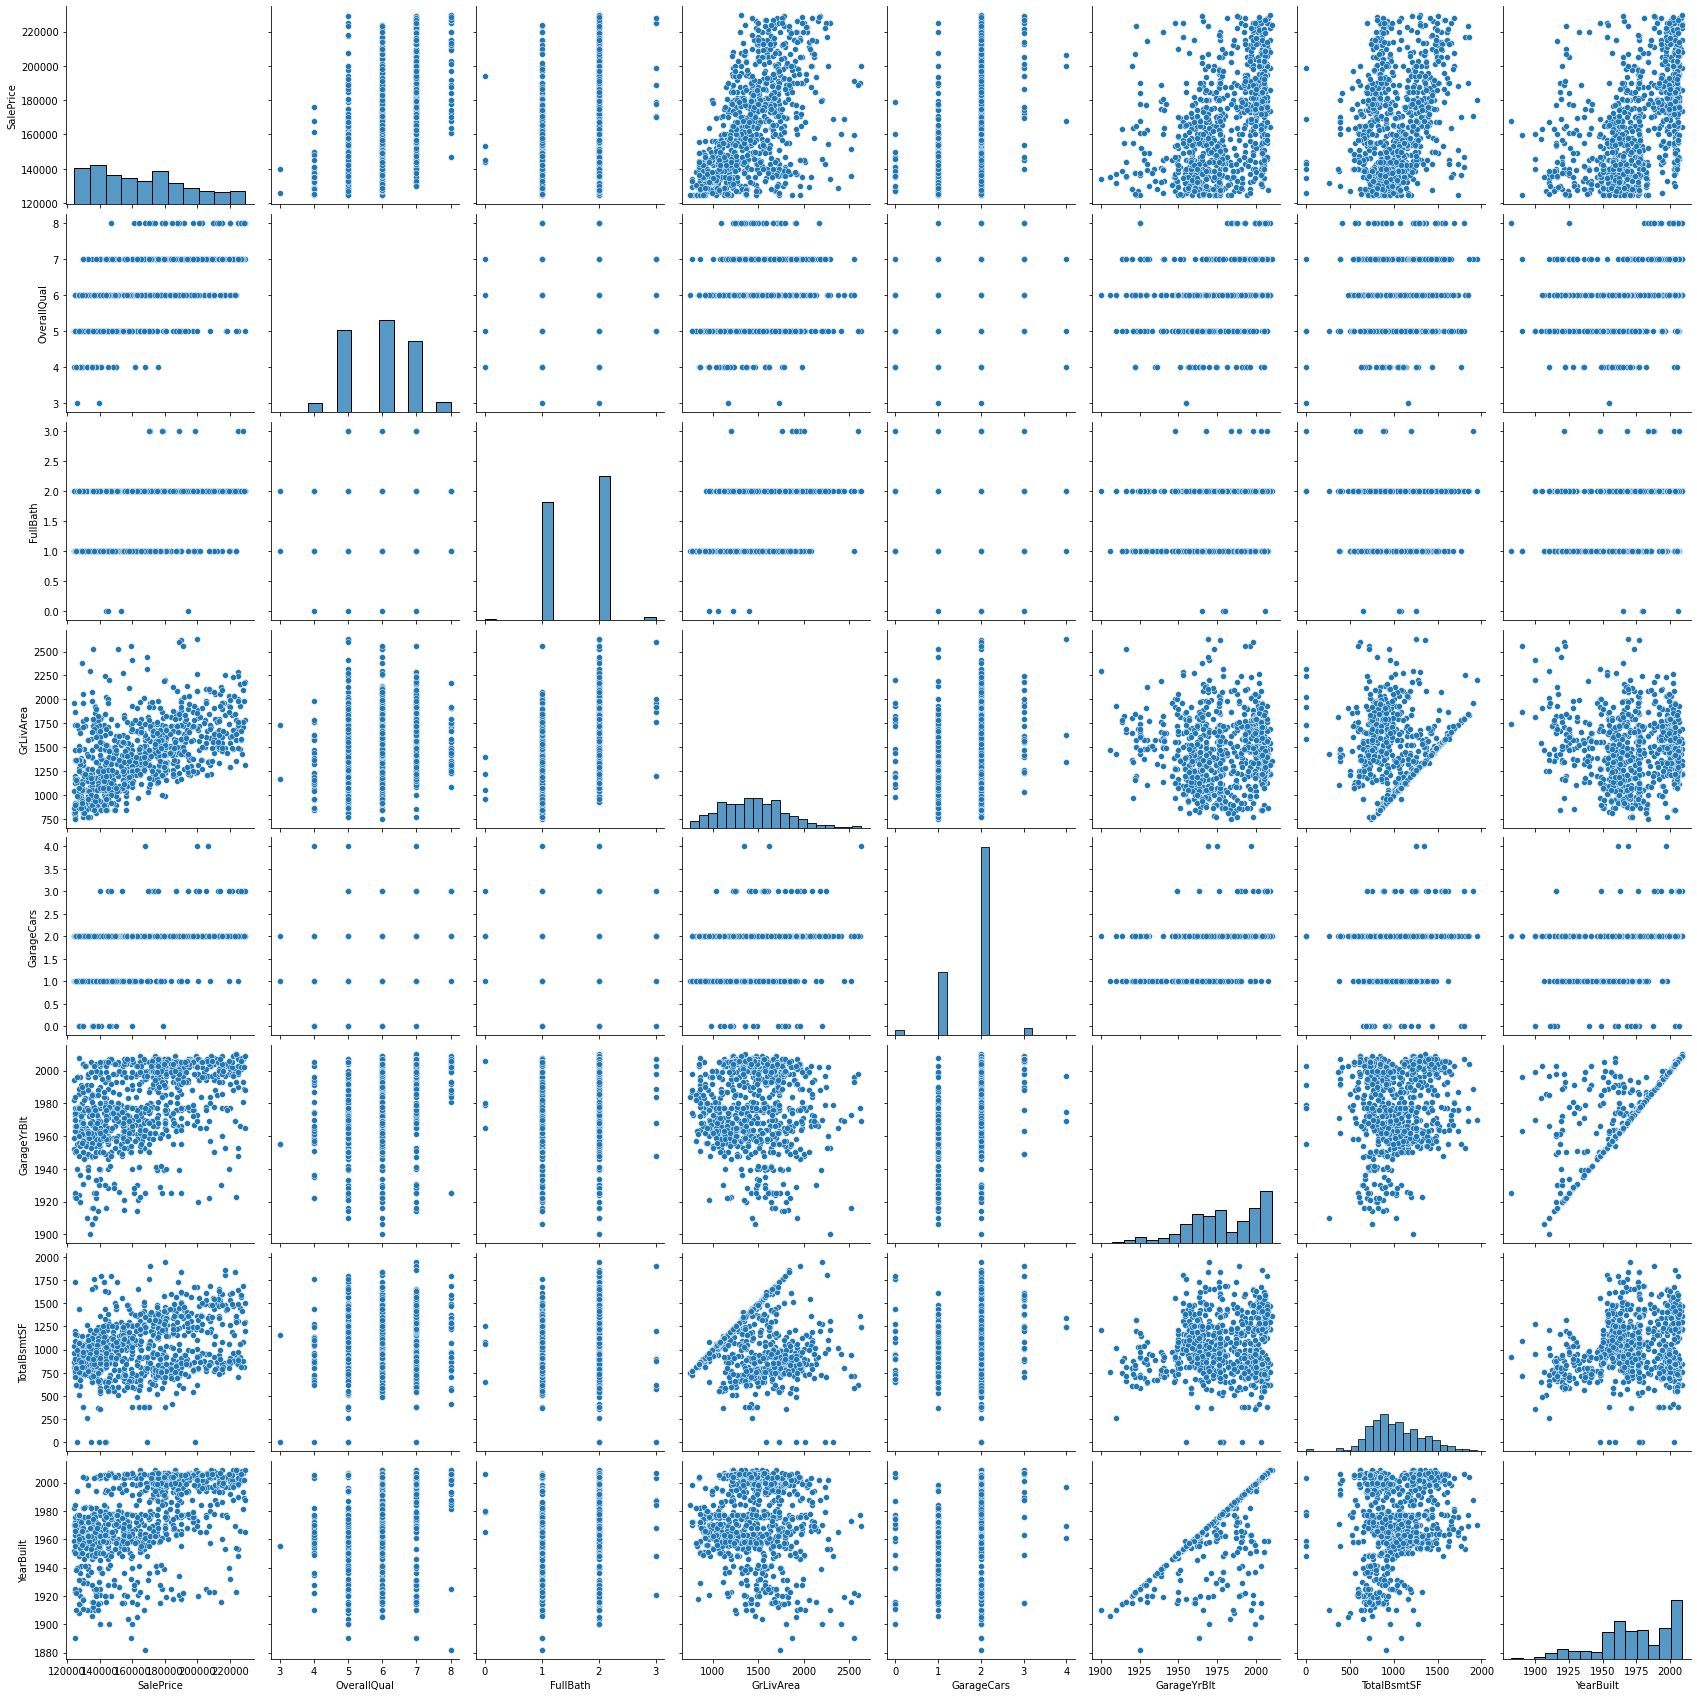

In [ ]:
arrtibutes=['SalePrice','OverallQual', 'FullBath','GrLivArea', 'GarageCars','GarageYrBlt', 'TotalBsmtSF', 'YearBuilt']
fig=plt.figure (figsize=(8,4))
sns.pairplot(sale_price[arrtibutes], height=3)

The outliars are removed, the data set is clean and good to feed to the machine learning algorithms.

<Figure size 864x360 with 0 Axes>

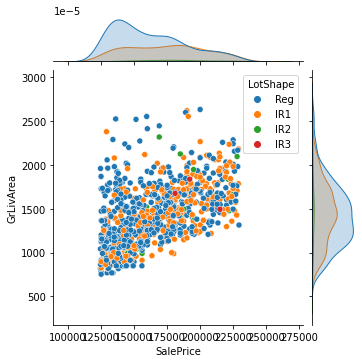

In [ ]:
#The seaborn joinplot of SalePrice to GrLivArea
fig=plt.figure(figsize=(12,5))
sns.jointplot(data =sale_price,x='SalePrice', y='GrLivArea', kind='scatter',height=5,dropna=True,hue='LotShape')
plt.show()

From the above seabron scatter plot, there is almost eqaul number of Regular and Slightly irregular sshape property. 

<Figure size 864x360 with 0 Axes>

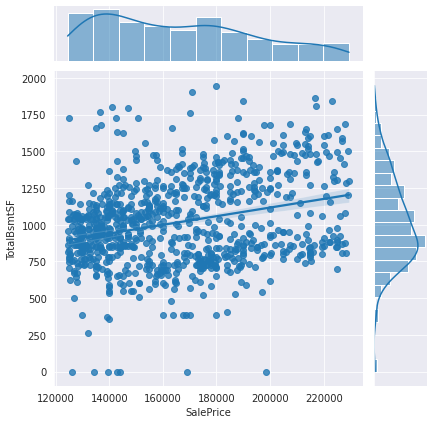

In [ ]:
#The seaborn joinplot of SalePrice to GrLivArea
fig=plt.figure(figsize=(12,5))
sns.jointplot(data =sale_price,x='SalePrice', y='TotalBsmtSF', kind='reg',dropna=True)
plt.show()

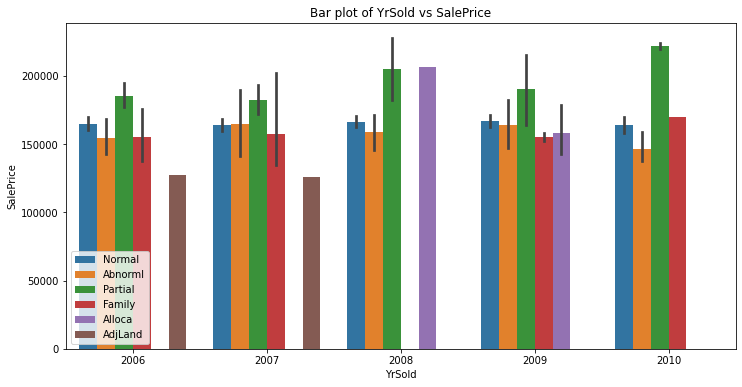

In [ ]:
# year sold and sale price based on the SaleCondition: Condition of sale
fig=plt.figure(figsize=(12,6))
sns.barplot(data=sale_price,x='YrSold',y='SalePrice',hue='SaleCondition')
plt.title('Bar plot of YrSold vs SalePrice')
plt.legend()
plt.show()

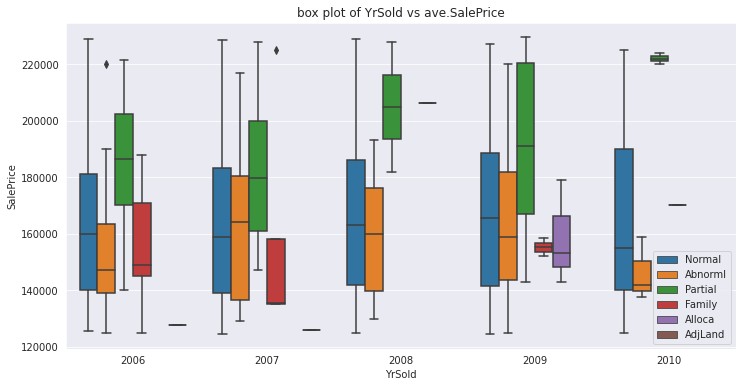

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.boxplot(data=sale_price,x='YrSold',y='SalePrice',hue='SaleCondition')
plt.title('box plot of YrSold vs ave.SalePrice')
plt.legend()
plt.show()


Normal: Normal Sale

Abnorml:	Abnormal Sale -  trade, foreclosure, short sale

AdjLand:	Adjoining Land Purchase

Alloca:	Allocation: - two linked properties with separate deeds, typically condo with a garage unit	

Family:	Sale between family members

Partial:	Home was not completed when last assessed (associated with New Homes)

In a year of 2006,the average price for a partial condition homes was 185000, normal was 160000. In every years, the average price for howes was not completed was much higher than others. This seems howes was not completed have higher demands than others. 

Text(0, 0.5, 'count')

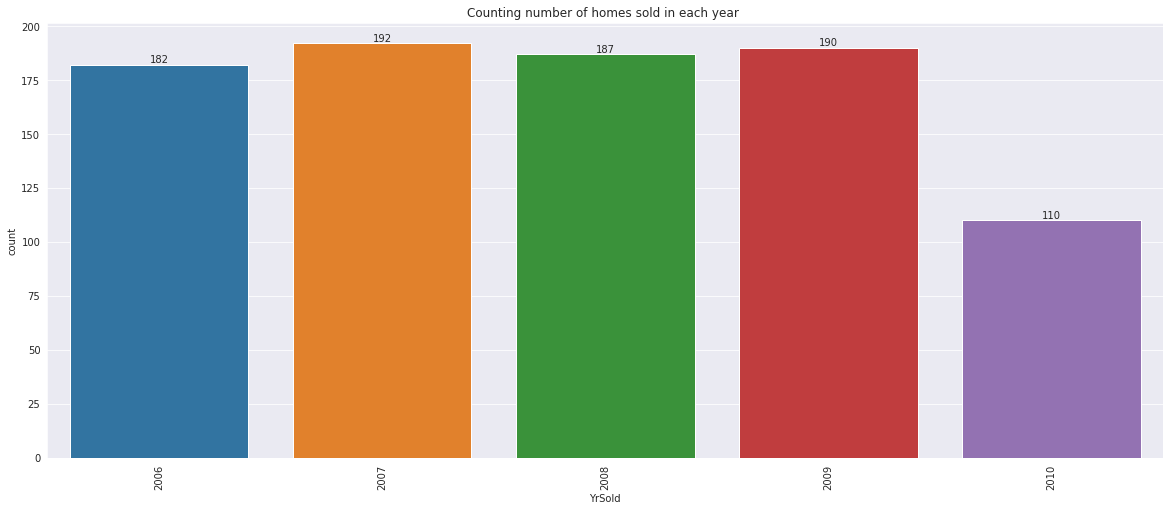

In [ ]:
plt.figure(figsize = (20, 8))
plot = sns.countplot(x ='YrSold', data=sale_price)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Counting number of homes sold in each year ")
plt.xlabel("YrSold")
plt.ylabel("count")

Filling and droping the missing values using fillna and dropna functions

# **Modeling**

The Modeling phase is about train and test the model to select the best performed model. In this phase,a machine learning regression models have been trained, developed, and selected to answer the business problems. 

**The main task of this phase**:

**Model Selection**:
Select which machine learning algorithms to try.

**Test design**: splitting the data into training, test, validation sets, or cross-validation. 

**Model development**: Fit models using the data prepared. Manage your

In this particular capstone, only Linear regression and Ridge model are trained and tested.

**Engineering Features**

This is an important step to transform the raw data into set of features.

In [ ]:
#reqd the data set
sale_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [ ]:
#grabing all features that have an object data type
categorical_columns=[]
for column in sale_price.columns:
  if sale_price[column].dtypes=='object':
    categorical_columns.append(column)

In [ ]:
#Those are the data attributs that have an object data type.
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
#Converting the categorical features into numerical
#Simple dummies method is used to convert the categorcal features into numerical features.
df_dummy=pd.get_dummies(sale_price)
df_dummy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_

In [ ]:
#shape of the dummied features and target
df_dummy.shape

(861, 267)

After converting the categorical features into numerical, the number of the attributes increases to 267 and 861 entries.

In [ ]:
#Filling or dropping the missing values
#The missing values has been filled by the average of their corresponding existing feature values
df_dummy.fillna(df_dummy.mean(),inplace=True)

**Train/Test Split**

In [ ]:
#Prepare the data, X is the attributes and y is the desired target
X=df_dummy.drop('SalePrice',axis=1)
y=df_dummy['SalePrice']

In [ ]:
#split the data into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#scaling the data set
#A standard scaler is used to normalize the data set
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)
scaled_train_df=pd.DataFrame(scaled_train, columns=X_train.columns)
scaled_test_df=pd.DataFrame(scaled_test,columns=X_test.columns)

In [ ]:
#Principal Component Analysis (PCA)
#Principal Component Analysis (PCA) is applied to reduce the dimensions
#PCA is a linear method that seeks to find the directions of maximum variance in the data 
#It is computationally efficient, can handle large datasets effectively, and faster
pca=PCA()
transformed_train=pca.fit_transform(scaled_train_df)
n_comp=pca.n_components_
explained_variance_ratio=pca.explained_variance_ratio_

Text(0.5, 1.0, 'scree plot')

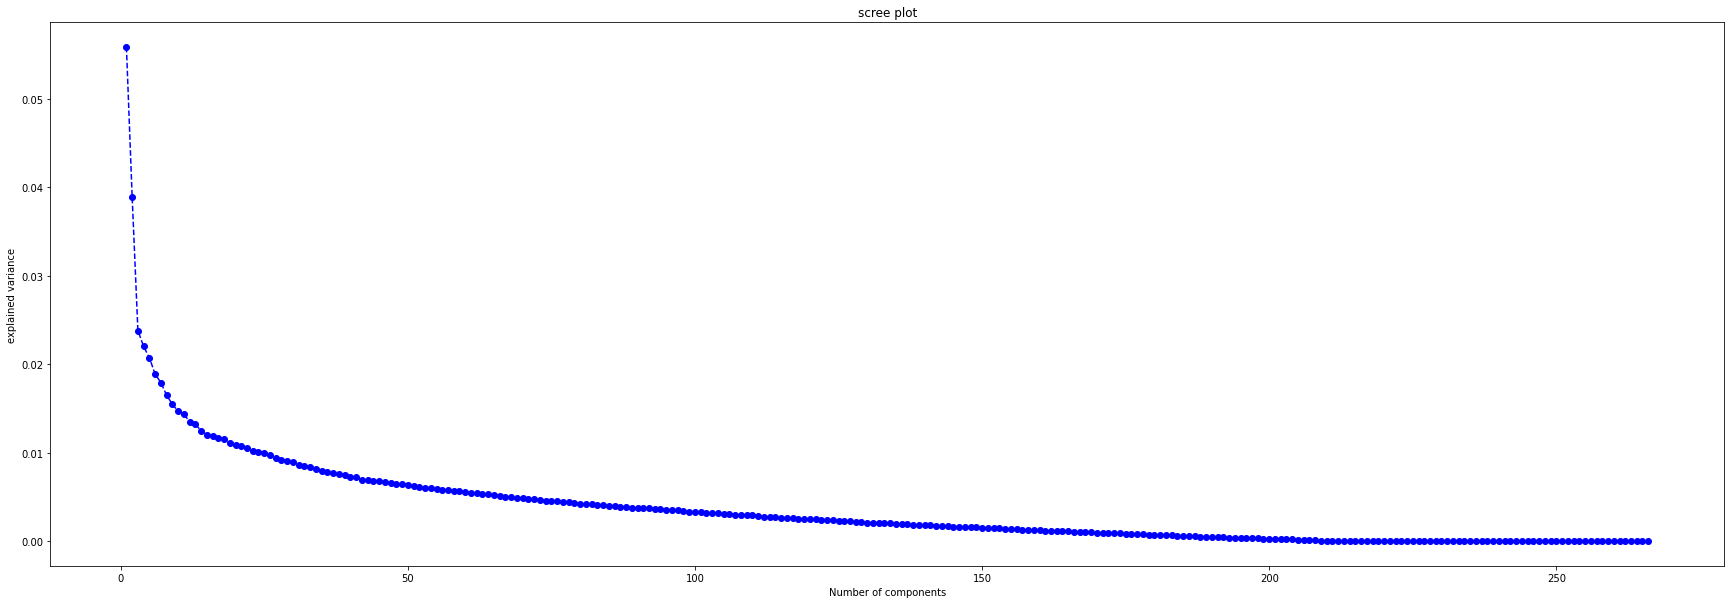

In [ ]:
# the scree plot of the Principal components
n_comp=np.arange(pca.n_components_)+1
plt.figure(figsize=(30,10))
plt.plot(n_comp,pca.explained_variance_ratio_,'--o', color='blue')
plt.xlabel('Number of components')
plt.ylabel('explained variance')
plt.title('scree plot')

From the above scree plot, only 10 features are used 

In [ ]:
#Calculating the eigen values and the percentage of explained variance
eigenvalue=pca.explained_variance_
pca.singular_values_
#Direct calcculating of the percentage of explained variance fromn the instantiate PCA
explained_variance_ratio=pca.explained_variance_ratio_

#Dhand crafted calculating of the percentage of expained variance
explained_variance_ratio=eigenvalue/(eigenvalue.sum()) 

In [ ]:
#Total number of components and the cummulative sum of the percentage of expained variance
print(f'the total number of components are:{pca.n_components_}')

##To select the desired number of components to keep the cumulative sum of the percentage of expained variance
print(f'the principal components which necessary to retain 90% of the explained variance are:{int((np.cumsum(pca.explained_variance_ratio_)<0.9).sum())}')

In [ ]:
#A TSNE data transformer has been trained. The model set only two components to see the scatter plot
# It is a non-linear method 
#more suitable for data that has a non-linear structure and can effectively capture complex relationships in the data.
#it is computationally expensive and may not scale well to large datasets.
tsne = TSNE(n_components=2, n_iter=10000, random_state=42)
projected_df = tsne.fit_transform(scaled_train_df)
projection = pd.DataFrame( data=projected_df,columns=['X1', 'X2'])
projection['SalePrice'] = sale_price['SalePrice']

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
projection.head()

,X1,X2,SalePrice
0,-4.808072,-1.883913,208500.0
1,-13.794943,-3.855718,181500.0
2,9.661301,-3.742049,223500.0
3,-28.020723,-6.700403,140000.0
4,3.176498,13.015912,NaN


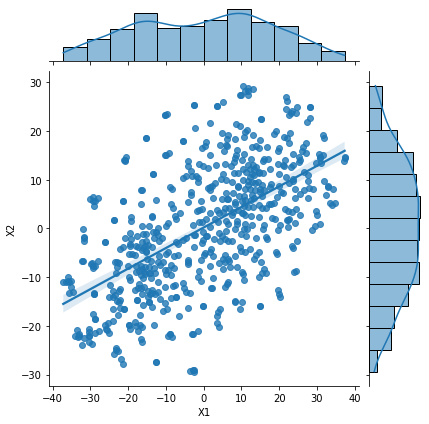

In [ ]:
#A seaborn jointplot is run and the kind set to "reg" to see the regression line
sns.jointplot(data=projection,x='X1',y='X2', kind='reg',color=None, palette='coolwarm')
plt.show()

From the above seaborn jointplot, the features are correlated to each other. A regression models will fit well. 

In [ ]:
#Make process simple
X_train=scaled_train_df
X_test=scaled_test_df


**Praper Pipe Lines**

In [ ]:
#Linear Regression Model
#The Linear regression Model includes pca,polynomial features,feature selector and classifier
#TBecuase the computer processor speed only 10  principal componets are considered
#The biases are excluded in the ploynomial features
# The LASSO model is used to select the best features in the SequentialFeatureSelector. 
#A forward direction has been used. The model tried only five cross validation.
#Last a linear Regression model has been trained
lr_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('polyFeatures',PolynomialFeatures(include_bias=False)),
           ('feature_selector',SequentialFeatureSelector(estimator=Lasso(max_iter=10000,),direction='forward',cv=5)),
           ('lr_model',LinearRegression())])

#Ridge Model
#The Ridge Model includes polynomail features and classifier
#The biases are excluded in the ploynomial features
#Last a Ridge model has been trained
ridge_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('polyFeatures',PolynomialFeatures(include_bias=False)),
           ('ridge_model',Ridge(solver='lsqr',max_iter=10000,random_state=42))])

**Tunning Hyperparametrs**

In [ ]:
#SequentialFeatureSelector hyperparamers dictionary
#The number of features selected and polynomial features are tunned

params_linear = {'polyFeatures__degree':[1,2,3],
                 'feature_selector__n_features_to_select': [1,2, 3, 4]}  

#Ridge model hyperparamers dictionary
#Only the learning rate is tunned
params_ridge = {'polyFeatures__degree':[2,3,4,5],
                'ridge_model__alpha':[0.001,0.1,1]}

**Prepare Grid Search**

In [ ]:
#Grid Search for all models
#Linear Regression model Grid search
lr_grid=GridSearchCV(estimator=lr_pipe,param_grid=params_linear,cv=5)

#Ridge model Grid search
ridge_grid=GridSearchCV(estimator=ridge_pipe,param_grid=params_ridge,cv=5)

**Train the Models**

In [ ]:
#First a baseline model has been trained.This is a simple model
bl_start_time=time.time()
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)
bl_end_time=time.time()
bl_time=(bl_end_time-bl_start_time)

In [ ]:
#The baseline model results
print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(602,) (259,)
Baseline for training data: 824440104.7427512
Baseline for testing data: 799738707.2379063


The base line model has 824440104.7427512 train error and 799738707.2379063 test error. 

In [ ]:
#Train Linear regression classifier
lr_start_time=time.time()
lr=lr_grid.fit(X_train,y_train)
lr_end_time=time.time()
lr_training_time=lr_end_time-lr_start_time

In [ ]:
#Models best parameters, scores, and Time taken
print(f'Linear Regression best parameters:{lr.best_params_}')
print(f'Linear Regression best score:{lr.best_score_}')
print(f'The Linear regression model train time is:{lr_training_time}')

Linear Regression best parameters:{'feature_selector__n_features_to_select': 4, 'polyFeatures__degree': 2}
Linear Regression best score:0.54755351304806
The Linear regression model train time is:207.86030673980713


The Linear Regression model scored 0.54755351304806 and take 207.86030673980713 seconds to train the model. The model select 4 features and use a degree 2 polynomial. 

In [ ]:
#Train Ridge classifier
ridge_start_time=time.time()
ridge=ridge_grid.fit(X_train,y_train)
ridge_end_time=time.time()
ridge_training_time=ridge_end_time-ridge_start_time

In [ ]:
#Models best parameters, scores, and Time taken
print(f'Ridge best parameters:{ridge.best_params_}')
print(f'Ridge best score:{ridge.best_score_}')
print(f'The Ridge model train time is:{ridge_training_time}')

Ridge best parameters:{'polyFeatures__degree': 2, 'ridge_model__alpha': 1}
Ridge best score:0.6089265476036078
The Ridge model train time is:7.909524202346802


The Ridge model scored 0.6089265476036078 the same as Linear Regression models and take only 7.909 seconds to train. This model is much fater than the linear regression interms of computation. The model use a ploynomial degree 2 and select 1 an alpha value. 

In [ ]:
#Predictions of all models on the train and test data set
train_lr_pred=lr_grid.predict(X_train)
test_lr_pred=lr_grid.predict(X_test)
train_ridge_pred=ridge_grid.predict(X_train)
test_ridge_pred=ridge_grid.predict(X_test)

In [ ]:
#Calculate the mean squared error
#Calculating a mean sqaure error for each models
train_mse_lr=mean_squared_error(y_train,train_lr_pred)
test_mse_lr=mean_squared_error(y_test,test_lr_pred)
train_mse_ridge=mean_squared_error(y_train,train_ridge_pred)
test_mse_ridge=mean_squared_error(y_test,test_ridge_pred)
print(f'train mean squared erro: {train_mse_lr}')
print(f'train mean squared erro: {test_mse_lr}')
print('\n')
print(f'test mean squared erro: {train_mse_ridge}')
print(f'test mean squared erro: {test_mse_ridge}')

train mean squared erro: 334028062.8797531
train mean squared erro: 279967464.83519423


test mean squared erro: 227837114.01943877
test mean squared erro: 261244734.15306896


Even though both models have smaller error than the baseline model, the Ridge model has much smaller error and much faster than the Linear regression model. However, the model have a larger errorn on the test data than Linear Regression model. 

In [ ]:
# Dataframe all models 
pd.DataFrame({'Models':['BaseLine Model','LinearRegression Model','Ridge Model'],
              'Train Error':[mse_baseline_train,train_mse_lr,train_mse_ridge],
              'Test Error':[mse_baseline_test,test_mse_lr,test_mse_ridge],
              'Time in Seconds':[bl_time,lr_training_time,ridge_training_time]}).set_index('Models')

,Train Error,Test Error,Time in Seconds
Models,,,
BaseLine Model,8.244401e+08,7.997387e+08,0.002220
LinearRegression Model,3.340281e+08,2.799675e+08,207.860307
Ridge Model,2.278371e+08,2.612447e+08,7.909524


The above data Frame shows, the results and train time in seconds of all models. Like, mentioned above even though the Linear Regression and Ridge models have smaller error than the baseline model on both train and test data set, the Ridge model has much smaller error and much faster than the Linear regression model.

# Work will add on the final capstone:
1. Apply feature Engineering to tranform a catogerical data into numerical
3. Add Gradient Base Regressor and Random Forest Regressor model
4. Comparing result of new model and previous models
5. Apply a TranformTarget model and choose the best
5. Recommend the best model